In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. explore data

In [46]:
data1 = pd.read_csv("data/measurements.csv")

In [47]:
data2 = pd.read_excel("data/measurements2.xlsx")

In [48]:
data1

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [49]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [50]:
data1["refill gas"].value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill gas, dtype: int64

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [ ]:
# skipped data1 as some numerical values are still as object - from the data itlsef data1 = data2

In [52]:
data2 = data2.drop(columns = ["specials", "refill liters", "refill gas"])

In [53]:
data2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [ ]:
# consumption per distance is the target value

In [54]:
data2["consume/distance"] = np.round(data2["consume"]/data2["distance"], 2)

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          388 non-null    float64
 1   consume           388 non-null    float64
 2   speed             388 non-null    int64  
 3   temp_inside       376 non-null    float64
 4   temp_outside      388 non-null    int64  
 5   gas_type          388 non-null    object 
 6   AC                388 non-null    int64  
 7   rain              388 non-null    int64  
 8   sun               388 non-null    int64  
 9   consume/distance  388 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 30.4+ KB


In [56]:
data2

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume/distance
0,28.0,5.0,26,21.5,12,E10,0,0,0,0.18
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.35
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.49
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.30
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.24
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.23
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.27
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.24
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.30


In [57]:
data2[data2["gas_type"] == "E10"]["consume/distance"].mean()

0.4364375

In [58]:
data2[data2["gas_type"] == "E10"]["temp_inside"].mean()

21.9171974522293

In [59]:
data2[data2["gas_type"] == "SP98"]["consume/distance"].mean()

0.5062280701754385

In [60]:
data2[data2["gas_type"] == "SP98"]["temp_inside"].mean()

21.938356164383563

In [61]:
ho = OneHotEncoder()
ho.fit(data2[["gas_type"]])

OneHotEncoder()

In [62]:
gas_type = pd.DataFrame(ho.transform(data2[["gas_type"]]).toarray(), columns=ho.get_feature_names_out(data2[["gas_type"]].columns))

In [63]:
gas_type

,gas_type_E10,gas_type_SP98
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
383,0.0,1.0
384,0.0,1.0
385,0.0,1.0
386,0.0,1.0


In [64]:
data2 = pd.concat([data2, gas_type], axis=1)

In [65]:
data2

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,consume/distance,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,E10,0,0,0,0.18,1.0,0.0
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.35,1.0,0.0
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.49,1.0,0.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.30,1.0,0.0
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.24,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.23,0.0,1.0
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.27,0.0,1.0
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.24,0.0,1.0
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.30,0.0,1.0


In [66]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          388 non-null    float64
 1   consume           388 non-null    float64
 2   speed             388 non-null    int64  
 3   temp_inside       376 non-null    float64
 4   temp_outside      388 non-null    int64  
 5   gas_type          388 non-null    object 
 6   AC                388 non-null    int64  
 7   rain              388 non-null    int64  
 8   sun               388 non-null    int64  
 9   consume/distance  388 non-null    float64
 10  gas_type_E10      388 non-null    float64
 11  gas_type_SP98     388 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 36.5+ KB


In [67]:
data2["delta_temp"] = data2["temp_inside"] - data2["temp_outside"]

In [68]:
data2 = data2.drop(columns=["distance", "consume", "temp_inside", "temp_outside", "gas_type"])

In [70]:
data2

,speed,AC,rain,sun,consume/distance,gas_type_E10,gas_type_SP98,delta_temp
0,26,0,0,0,0.18,1.0,0.0,9.5
1,30,0,0,0,0.35,1.0,0.0,8.5
2,38,0,0,0,0.49,1.0,0.0,6.5
3,36,0,0,0,0.30,1.0,0.0,7.5
4,46,0,0,0,0.24,1.0,0.0,6.5
...,...,...,...,...,...,...,...,...
383,39,0,0,0,0.23,0.0,1.0,6.5
384,38,1,0,0,0.27,0.0,1.0,-6.0
385,45,0,0,0,0.24,0.0,1.0,6.0
386,42,1,0,0,0.30,0.0,1.0,-6.0


In [76]:
data2.describe()

,speed,AC,rain,sun,consume/distance,gas_type_E10,gas_type_SP98,delta_temp
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,376.000000
mean,41.927835,0.077320,0.123711,0.082474,0.477448,0.412371,0.587629,10.589096
std,13.598524,0.267443,0.329677,0.275441,0.770692,0.492897,0.492897,6.767819
min,14.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,-8.000000
25%,32.750000,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000,6.000000
50%,40.500000,0.000000,0.000000,0.000000,0.320000,0.000000,1.000000,11.500000
75%,50.000000,0.000000,0.000000,0.000000,0.430000,1.000000,1.000000,15.500000
max,90.000000,1.000000,1.000000,1.000000,8.850000,1.000000,1.000000,26.000000


In [86]:
data2["delta_temp"] = data2["delta_temp"].fillna(data2["delta_temp"].mean())

In [87]:
X = data2.drop(columns=["consume/distance"])
y = data2["consume/distance"]

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   speed          388 non-null    int64  
 1   AC             388 non-null    int64  
 2   rain           388 non-null    int64  
 3   sun            388 non-null    int64  
 4   gas_type_E10   388 non-null    float64
 5   gas_type_SP98  388 non-null    float64
 6   delta_temp     388 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 21.3 KB


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
min_max = MinMaxScaler()
min_max.fit(X_train)

MinMaxScaler()

In [121]:
X_train_transformed = pd.DataFrame(min_max.transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(min_max.transform(X_test), columns=X_test.columns)

In [128]:
lr = LinearRegression()

In [129]:
lr.fit(X_train_transformed, np.log(y_train))

LinearRegression()

In [132]:
y_train_predict = lr.predict(X_train_transformed)
y_test_predict = lr.predict(X_test_transformed)

In [134]:
print("R2 Score, train:", r2_score(np.log(y_train), y_train_predict))
print("MSE, train:", mean_squared_error(np.log(y_train), y_train_predict))
print("MAE, train:", mean_absolute_error(np.log(y_train), y_train_predict))
print("R2 Score, test:", r2_score(np.log(y_test), y_test_predict))
print("MSE, test:", mean_squared_error(np.log(y_test), y_test_predict))
print("MAE, test:", mean_absolute_error(np.log(y_test), y_test_predict))

R2 Score, train: 0.38941073148697225
MSE, train: 0.36821657821881976
MAE, train: 0.4593534232662392
R2 Score, test: 0.2916431531637592
MSE, test: 0.43388285673921434
MAE, test: 0.5066514463533246


In [ ]:
# no predictions possible on this base

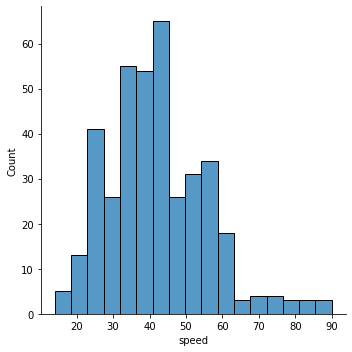

In [96]:
sns.displot(data2["speed"])

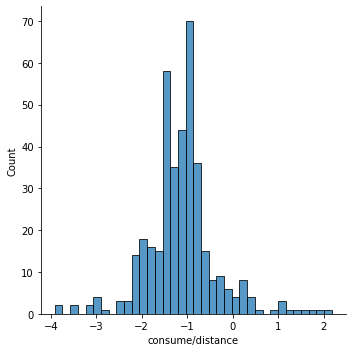

In [100]:
sns.displot(np.log(data2["consume/distance"]))

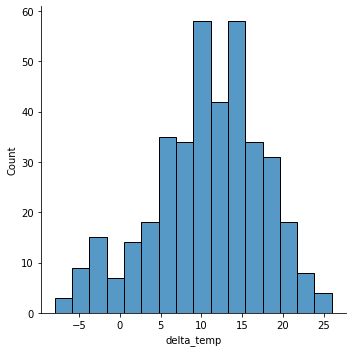

In [104]:
sns.displot((data2["delta_temp"]))

In [ ]:
#Hypothesis testing sig-level: 0.05 H0: Consumption E10 smaller than consumption E98

In [106]:
t_statistic, p_value = st.ttest_1samp(data2[data2["gas_type_E10"] == 1.0]["consume/distance"], popmean = data2[data2["gas_type_E10"] == 0.0]["consume/distance"].mean(), alternative = "less")

In [108]:
p_value

0.08830558382240052

In [110]:
data2[data2["gas_type_E10"] == 1.0]["consume/distance"].mean()

0.4364375

In [111]:
data2[data2["gas_type_E10"] == 0.0]["consume/distance"].mean()

0.5062280701754385

In [79]:
def show_nan(df):
    for item in df.columns:
        print(df[item].value_counts(dropna=False))